In [107]:
library(viridis)

In [40]:
site<-'NZSIBT'
LT50<-33.3

In [41]:
basefolder <- paste("../processedoutput/", site, "/", sep="")
mtfiles<-list.files(basefolder)

In [85]:
for(a in 1:length(mtfiles)){
    height<-substr(mtfiles[a], 16, 18)
    print(paste(height, 'cm'))
    
    data<-read.table(paste(basefolder, mtfiles[a], sep=""), header=TRUE)
    data$year<-substr(data$Date, 1, 4)
    data<-subset(data, data$year>=1997)
    data$yearmonth<-substr(data$Date, 1, 7)
    
    Tmax<-aggregate(data$Temp, list(data$yearmonth), max)
    colnames(Tmax)<-c('yearmonth', 'Tmax')
    
    LTtimes<-subset(data, data$Temp>=LT50)
    
    if(nrow(LTtimes)>0){
        LTDate <- aggregate(LTtimes$Temp, list(LTtimes$Date), NROW)
        colnames(LTDate)<-c('Date', 'MinsLT')
        LTDate$MinsLT <- LTDate$MinsLT*30
        LTDate$HoursLT <- LTDate$MinsLT/60
        LTDate$yearmonth<-substr(LTDate$Date, 1, 7)
        AboveLT <- aggregate(LTDate$HoursLT, list(LTDate$yearmonth), max)
        colnames(AboveLT) <- c("yearmonth", 'TimeTotal')

        allmonths<-merge(Tmax, AboveLT, all=TRUE)
        Tmax <- allmonths[,c('yearmonth', 'Tmax')]
        AboveLT <- allmonths[,c('yearmonth', 'TimeTotal')]

        colnames(Tmax)[2]<-height
        colnames(AboveLT)[2]<-height
    
    }else{
        
        AboveLT <- Tmax
        AboveLT$Tmax<- rep(NA)
        
        colnames(Tmax)[2]<-height
        colnames(AboveLT)[2]<-height
        
    }
    
    if(a==1){
        MaxTemp <- Tmax        
        MaxTime <- AboveLT
        
    }else{
        
        MaxTemp[,(a+1)] <- Tmax[,2]
        MaxTime[,(a+1)] <- AboveLT[,2]
        
    }
    
    colnames(MaxTemp)[a+1] <- height
    colnames(MaxTime)[a+1] <- height
    
}

[1] "050 cm"
[1] "060 cm"
[1] "070 cm"
[1] "080 cm"
[1] "090 cm"
[1] "100 cm"
[1] "110 cm"
[1] "120 cm"
[1] "130 cm"
[1] "140 cm"
[1] "150 cm"
[1] "160 cm"
[1] "170 cm"
[1] "180 cm"
[1] "190 cm"
[1] "200 cm"
[1] "210 cm"
[1] "220 cm"
[1] "230 cm"
[1] "240 cm"
[1] "250 cm"


In [90]:
t(MaxTemp[,-1])

050,25.1,29.5,24.5,23.0,20.8,16.2,14.4,14.4,19.3,22.5,⋯,27.3,23.2,16.8,16.3,14.2,18.2,21.5,22.4,26.5,26.8
060,25.4,29.9,25.8,23.5,20.8,16.2,14.4,14.5,19.3,22.9,⋯,27.4,23.4,17.4,16.6,14.2,18.5,21.5,23.2,26.6,27.7
070,26.1,29.9,25.8,23.5,20.8,16.2,14.4,15.2,19.7,22.9,⋯,27.8,23.4,17.3,16.6,14.2,18.5,21.7,23.2,27.2,27.8
080,26.3,29.9,25.8,23.5,20.9,16.3,14.5,15.2,19.7,23.5,⋯,27.8,23.6,17.7,16.8,14.3,18.5,22.0,23.6,27.6,28.5
090,27.1,30.2,26.8,23.9,20.9,16.2,14.5,15.2,19.9,23.5,⋯,28.2,23.7,17.7,16.8,14.3,18.7,22.0,23.6,27.6,28.8
100,27.2,30.2,26.8,23.9,20.9,16.3,14.5,16.2,19.9,24.5,⋯,28.3,23.9,17.9,17.0,14.3,18.7,22.3,23.8,28.0,28.8
110,27.7,30.3,26.8,23.9,20.9,16.2,14.5,16.2,20.6,24.6,⋯,28.5,23.9,17.9,17.1,14.3,18.9,22.3,23.8,28.0,29.7
120,27.8,30.6,27.6,24.1,20.9,16.4,14.5,17.0,20.6,25.4,⋯,28.6,23.9,18.1,17.1,14.3,18.9,22.3,24.0,28.4,30.4
130,28.3,30.6,27.6,24.1,20.9,16.4,14.4,17.0,21.2,26.1,⋯,28.9,24.1,18.2,17.2,14.3,19.0,22.4,24.0,28.4,31.1
140,28.6,30.6,27.6,24.1,20.9,16.4,14.4,17.7,21.6,26.7,⋯,29.1,24.1,18.2,17.3,14.6,19.1,22.4,24.1,28.8,31.3
150,28.8,30.9,28.1,24.2,20.9,16.3,14.4,18.2,21.6,26.9,⋯,29.4,25.1,19.3,17.5,14.5,19.3,22.5,24.4,29.1,33.1


In [105]:
MaxTime[is.na(MaxTime)] <- 0
rownames(MaxTime)<-MaxTime[,1]
MaxTime<-MaxTime[,-1]

In [106]:
head(MaxTime)

,050,060,070,080,090,100,110,120,130,140,⋯,160,170,180,190,200,210,220,230,240,250
1997-01,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1997-02,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.5,0.5,0.5,0.5,0.5
1997-03,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1997-04,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1997-05,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1997-06,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


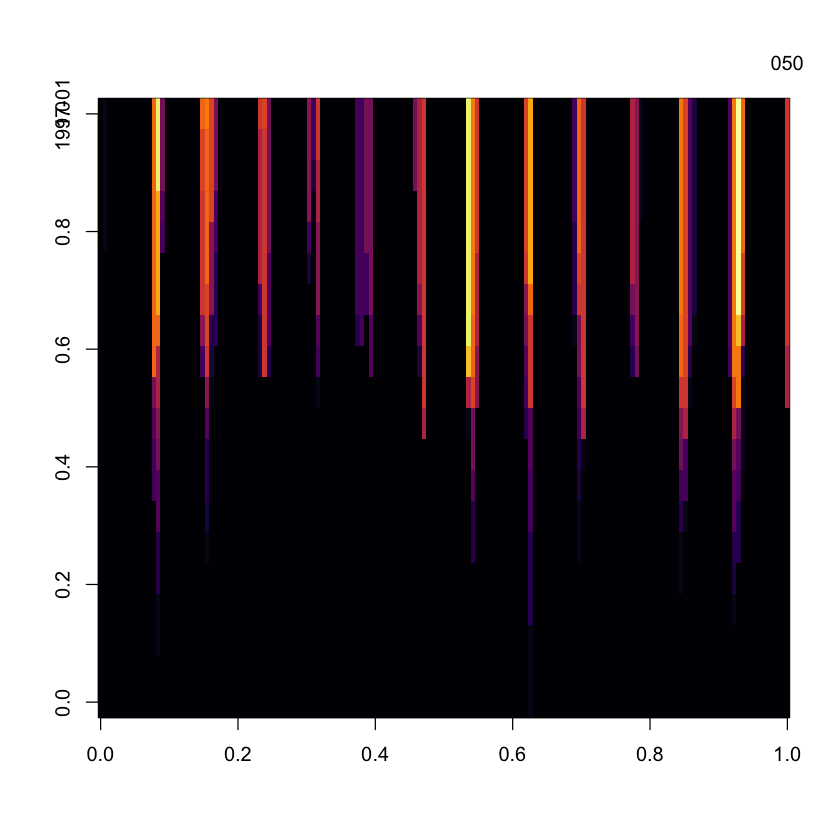

In [122]:
image(as.matrix(MaxTime[,-1]), col=inferno(25), axes=TRUE)
axis(3, at = 1:ncol(MaxTime), labels=colnames(MaxTime),srt=45,tick=FALSE)
axis(2, at = 1:nrow(MaxTime), labels=rownames(MaxTime),srt=45,tick=FALSE)

In [123]:
1:nrow(MaxTime)

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156